# Statistical modeling and machine learning

This Jupyter Notebook demonstrates how to use the `scikit-learn` library to perform statistical modeling and machine learning. The notebook is organized as follows:

1. [Data preparation](#Data-preparation)
2. [Logistic regression](#Logistic-regression)
3. [Random forest](#Random-forest)
4. [Neural network](#Neural-network)

The data transformation and feature engineering steps are the third step of the data science workflow:

1. Data collection, cleaning, formatting and storage
2. Data transformation and feature engineering    
3. Statistical modeling and machine learning    <-- We are here
4. Visualization and presentation

In [15]:
# import libraries
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
# read data
df = pd.read_csv('../data/processed_data/processed_data.csv')
scaled_df = pd.read_csv('../data/processed_data/processed_data_scaled.csv')
print(scaled_df.head())

   LIMIT_BAL       SEX  EDUCATION  MARRIAGE       AGE     PAY_1     PAY_2  \
0  -1.136720  0.810161   0.185828 -1.057295 -1.246020  1.794564  1.782348   
1  -0.365981  0.810161   0.185828  0.858557 -1.029047 -0.874991  1.782348   
2  -0.597202  0.810161   0.185828  0.858557 -0.161156  0.014861  0.111736   
3  -0.905498  0.810161   0.185828 -1.057295  0.164303  0.014861  0.111736   
4  -0.905498 -1.234323   0.185828 -1.057295  2.334029 -0.874991  0.111736   

      PAY_3     PAY_4     PAY_5  ...  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
0 -0.696663 -0.666599 -1.530046  ...  -0.667993  -0.672497  -0.663059   
1  0.138865  0.188746  0.234917  ...  -0.639254  -0.621636  -0.606229   
2  0.138865  0.188746  0.234917  ...  -0.482408  -0.449730  -0.417188   
3  0.138865  0.188746  0.234917  ...   0.032846  -0.232373  -0.186729   
4 -0.696663  0.188746  0.234917  ...  -0.161189  -0.346997  -0.348137   

   BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
0  -0.652724 -0.341942 

In [7]:
# Data preparation
# split data into train and test

X_train, X_test, y_train, y_test = train_test_split(scaled_df, df['dpnm'], test_size = 0.30, random_state=42)

[[6824  216]
 [1505  455]]
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      7040
           1       0.68      0.23      0.35      1960

    accuracy                           0.81      9000
   macro avg       0.75      0.60      0.62      9000
weighted avg       0.79      0.81      0.77      9000



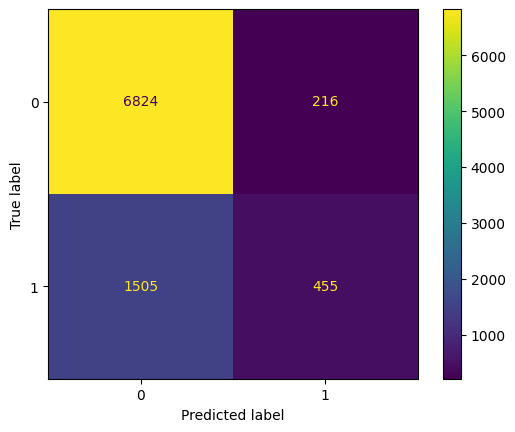

In [14]:
# Logistic Regression
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
predictions = logmodel.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
ConfusionMatrixDisplay.from_estimator(logmodel, X_test, y_test)
plt.show()

[[6611  429]
 [1241  719]]
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7040
           1       0.63      0.37      0.46      1960

    accuracy                           0.81      9000
   macro avg       0.73      0.65      0.68      9000
weighted avg       0.79      0.81      0.80      9000



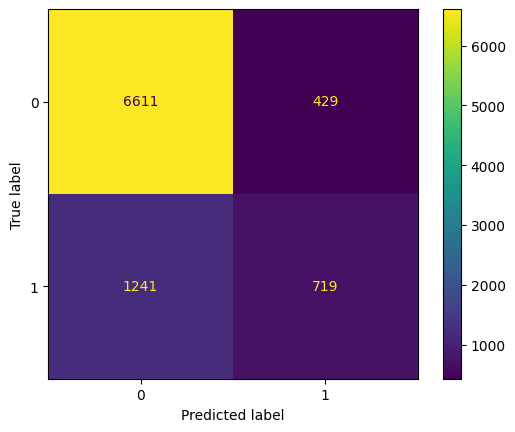

In [16]:
# Random Forest

rfc = RandomForestClassifier(n_estimators = 400)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test) 
print(confusion_matrix(y_test, rfc_pred))
print(classification_report(y_test, rfc_pred))
ConfusionMatrixDisplay.from_estimator(rfc, X_test, y_test)

In [17]:
# Neural Network
# import libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [19]:
# create model

model = Sequential()
# input layer
model.add(Dense(50,  activation='relu'))
model.add(Dropout(0.4))

# hidden layer
model.add(Dense(25, activation='relu'))
model.add(Dropout(0.4))

# hidden layer
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.4))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

# early stopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

# fit model
model.fit(x=X_train, 
          y=y_train, 
          epochs=150,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

neural_predict = (model.predict(X_test) > 0.5).astype("int32")

Epoch 1/150
657/657 [==============================] - 1s 1ms/step - loss: 0.5491 - val_loss: 0.4708
Epoch 2/150
657/657 [==============================] - 1s 1ms/step - loss: 0.4941 - val_loss: 0.4552
Epoch 3/150
657/657 [==============================] - 1s 1ms/step - loss: 0.4774 - val_loss: 0.4546
Epoch 4/150
657/657 [==============================] - 1s 1ms/step - loss: 0.4708 - val_loss: 0.4515
Epoch 5/150
657/657 [==============================] - 1s 1ms/step - loss: 0.4662 - val_loss: 0.4500
Epoch 6/150
657/657 [==============================] - 1s 1ms/step - loss: 0.4645 - val_loss: 0.4469
Epoch 7/150
657/657 [==============================] - 1s 1ms/step - loss: 0.4580 - val_loss: 0.4429
Epoch 8/150
657/657 [==============================] - 1s 1ms/step - loss: 0.4553 - val_loss: 0.4424
Epoch 9/150
657/657 [==============================] - 1s 1ms/step - loss: 0.4579 - val_loss: 0.4445
Epoch 10/150
657/657 [==============================] - 1s 1ms/step - loss: 0.4554 - val_lo

In [20]:
print(confusion_matrix(y_test, neural_predict))
print(classification_report(y_test, neural_predict))

[[6724  316]
 [1325  635]]
              precision    recall  f1-score   support

           0       0.84      0.96      0.89      7040
           1       0.67      0.32      0.44      1960

    accuracy                           0.82      9000
   macro avg       0.75      0.64      0.66      9000
weighted avg       0.80      0.82      0.79      9000

